In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.integrate import simpson

from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_folder =  './FLIR/odt align'
t_exp = 10e-6
picturesPerIteration = 3
# t0 = 40e-6


rowstart = 0#243#450
rowend = -1#560
columnstart = 0#600
columnend = -1#900
#config = ImageAnalysisCode.LoadConfigFile(dataFolder = data_folder)
binsize=4

In [3]:
AA = np.array([ ii+np.random.rand(10,10) for ii in range(3)])

In [43]:
AA

array([[[0.05309043, 0.23848394, 0.89967033, 0.52427109, 0.58195987,
         0.4565538 , 0.75611681, 0.86989442, 0.86348855, 0.21912723],
        [0.19286709, 0.52129323, 0.29244974, 0.28576613, 0.93527249,
         0.2853157 , 0.05146749, 0.04610904, 0.02899616, 0.18241022],
        [0.72512644, 0.31490334, 0.29706101, 0.70994601, 0.88797368,
         0.2626943 , 0.07468275, 0.13924969, 0.89998649, 0.31695123],
        [0.55881035, 0.7407415 , 0.39294623, 0.30964054, 0.78320176,
         0.72782915, 0.03275141, 0.9388813 , 0.82925475, 0.17525129],
        [0.27257841, 0.89513208, 0.55486004, 0.77103312, 0.49918103,
         0.96529563, 0.59194703, 0.40390621, 0.0594646 , 0.67587097],
        [0.04128964, 0.88650083, 0.35350838, 0.91387238, 0.21266252,
         0.87179386, 0.3971328 , 0.10938868, 0.15776365, 0.38746098],
        [0.473137  , 0.70728857, 0.02517872, 0.46768119, 0.78000949,
         0.85228623, 0.24220282, 0.50013746, 0.65965726, 0.84251645],
        [0.70422966, 0.3255

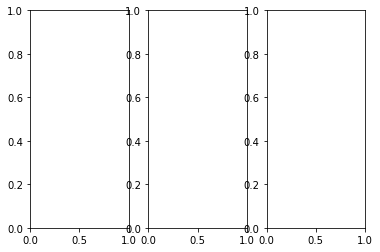

In [94]:
fig, axs = plt.subplots(1,3)

In [95]:
axs

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

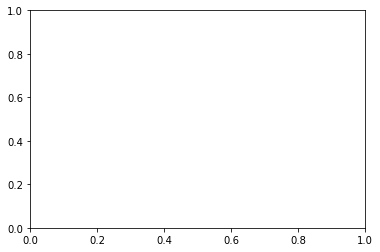

In [116]:
fig, axs = plt.subplots(1,1)

In [117]:
axs

<AxesSubplot:>

In [118]:
axsarray = np.array(axs)
axsarray

array(<AxesSubplot:>, dtype=object)

In [119]:
axsarray = np.array(axs)
axsarray

array(<AxesSubplot:>, dtype=object)

In [120]:
axsarray.shape

()

In [129]:
axsarray = axsarray.reshape([1, 1, -1])
axsarray

array([[[<AxesSubplot:>]]], dtype=object)

In [130]:
axsarray.shape

(1, 1, 1)

In [131]:
aa = np.array([2])

In [132]:
aa

array([2])

In [91]:
aa.shape

(1,)

In [67]:
axs[0]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

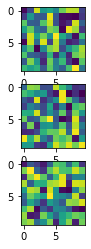

In [44]:
fig, axs = plt.subplots(3,1)

for ii in range(len(axs)):
    axs[ii].imshow(AA[ii])
#     plt.colorbar()
    
# plt.colorbar()

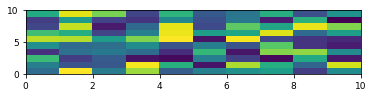

In [113]:
plt.subplot(3,1,1)
plt.pcolor(AA[0])

# plt.subplot(1,3,1)
# plt.pcolor(AA[1])

# plt.subplot(3,1,3)
# plt.pcolor(AA[2])

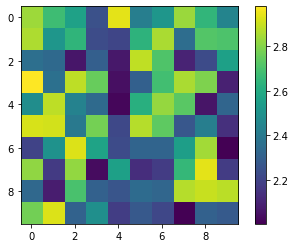

In [15]:
plt.imshow(AA[2])
plt.colorbar()

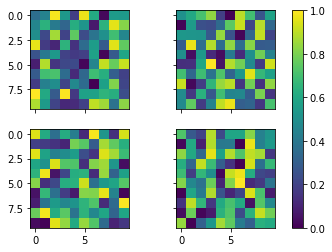

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
  
for ax in axes.flat:
    im = ax.imshow(np.random.random((10, 10)), vmin=0, vmax=1)
    
plt.colorbar(im, ax=axes.ravel().tolist())

In [23]:
axes.ravel().shape

(4,)

In [24]:
axes.flatten().shape

(4,)

In [26]:
ax=axes.ravel().tolist()

In [27]:
ax

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

In [29]:
AA = np.random.rand(2,3)
AA

array([[0.97169886, 0.65668476, 0.02688219],
       [0.64657241, 0.02991465, 0.72120143]])

In [32]:
type(AA.flat)

numpy.flatiter

In [36]:
AA.flatten().shape

(6,)

In [37]:
AA.ravel().shape

(6,)

In [16]:
np.random.randint?

In [5]:
aa = np.random.randint(1,50,10)
bb = np.random.randint(1,50,10)

In [6]:
aa

array([39,  3,  2, 41, 46, 28,  1,  9, 20, 11])

In [11]:
aa.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [7]:
bb

array([ 7, 35, 49,  8, 26,  9, 14, 25, 26,  4])

In [22]:
grid = np.meshgrid(aa, bb)

In [23]:
grid

[array([[44,  8, 16, 15],
        [44,  8, 16, 15],
        [44,  8, 16, 15],
        [44,  8, 16, 15]]),
 array([[22, 22, 22, 22],
        [36, 36, 36, 36],
        [43, 43, 43, 43],
        [30, 30, 30, 30]])]

In [24]:
grid[0].ravel()

array([44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15])

In [26]:
np.vstack( (grid[0].ravel(), grid[1].ravel()) )

array([[44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15],
       [22, 22, 22, 22, 36, 36, 36, 36, 43, 43, 43, 43, 30, 30, 30, 30]])

In [34]:
np.ones_like(grid[0], dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [42]:
mask = np.full(aa.shape, True)
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
mask[3:-3] = False

In [44]:
mask

array([ True,  True,  True, False, False, False, False,  True,  True,
        True])

In [52]:
pp = np.polyfit(aa, bb, 3)
pp

array([-4.22144870e-04,  2.38517060e-02,  1.27482701e-01,  1.12902784e+01])

In [53]:
xx = np.arange(aa.min(), aa.max(), 0.1)
yy = pp[0] * xx**3 + pp[1] * xx**2 + pp[2] * xx + pp[3]

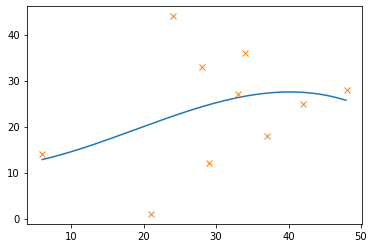

In [54]:
plt.plot(xx, yy, aa, bb, 'x')

In [55]:
aa

array([34, 24, 21, 28, 29, 42, 33, 48,  6, 37])

In [56]:
np.argmax(aa)

7

In [66]:
aa.max()/1.5

32.0

In [67]:
(aa < aa.max()/1.5).sum()

5

In [69]:
np.ptp(aa)

42

In [71]:
aa.ptp()

42